In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import pickle

import ipywidgets as widgets

plt.rcParams['figure.figsize'] = (16,8)

import joblib

# from functions import *
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Preprocessing 
Split the price into three categories (0:lowm, 1:medium, and 2:high)

In [2]:
data = pd.read_csv("../../Datasets/housing.csv")
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02T00:05:1398988800,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02T00:05:1398988800,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02T00:05:1398988800,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02T00:05:1398988800,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02T00:05:1398988800,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02T00:05:1398988800,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02T00:05:1398988800,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02T00:05:1398988800,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02T00:05:1398988800,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02T00:05:1398988800,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.103478,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.159990,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

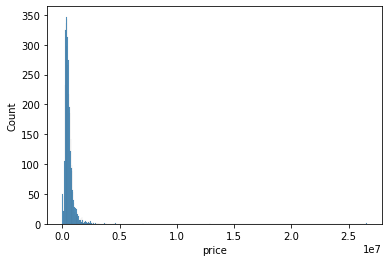

In [4]:
# sns.distplot(data['price'], hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
sns.histplot(data['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

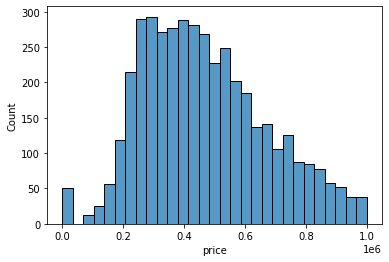

In [5]:
data = data[(data['price']<0.1e+07)]
sns.histplot(data['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

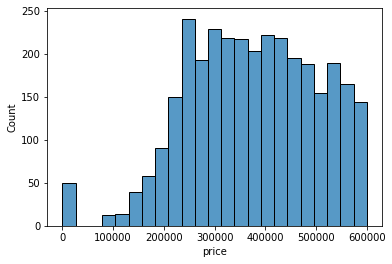

In [6]:
data = data[(data['price']<0.6e06)]
sns.histplot(data['price'])

In [7]:
data = pd.read_csv("../../Datasets/housing.csv")

#split price on three classes low (l, <400000), medium (m, 400000<0.6e06), high (h, >0.6e06)
data['output'] = np.where(data['price']<0.6e06, '1', '2')

data.loc[(data.output=='1') & (data['price']<400000), 'output']='0'

data.groupby('output').count()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
output,,,,,,,,,,,,,,,,,,
0,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774
1,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419
2,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407


In [15]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,output
0,2014-05-02T00:05:1398988800,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,0
1,2014-05-02T00:05:1398988800,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2
2,2014-05-02T00:05:1398988800,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0
3,2014-05-02T00:05:1398988800,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,1
4,2014-05-02T00:05:1398988800,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1


In [17]:
data.to_csv("../../Datasets/housing_classif.csv")

In [14]:
# sns.pairplot(data=data, hue='output')

#### Decision Trees modeling of output variable

In [8]:
data = pd.read_csv("../../Datasets/housing_classif.csv", index_col=0)

print(data.columns)
print(data['output'].unique())
data = data[data.city=="Seattle"]
data.head()

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'output'],
      dtype='object')
[0 2 1]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,output
1,2014-05-02T00:05:1398988800,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2
5,2014-05-02T00:05:1398988800,490000.0,2.0,1.0,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,1
9,2014-05-02T00:05:1398988800,640000.0,4.0,2.0,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,2
11,2014-05-02T00:05:1398988800,1400000.0,4.0,2.5,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA,2
13,2014-05-02T00:05:1398988800,365000.0,3.0,1.0,1090,6435,1.0,0,0,4,1090,0,1955,2009,2504 SW Portland Ct,Seattle,WA 98106,USA,0


In [9]:
#### Modeling without statezip

data1 = data.reset_index()[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'output']]

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'sqft_above', 
       'sqft_basement', 'yr_built', 'yr_renovated', 'statezip']
       
data1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,output
0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,2
1,2.0,1.0,880,6380,1.0,0,0,3,880,0,1938,1994,1
2,4.0,2.0,1520,6200,1.5,0,0,3,1520,0,1945,2010,2
3,4.0,2.5,2920,4000,1.5,0,0,5,1910,1010,1909,1988,2
4,3.0,1.0,1090,6435,1.0,0,0,4,1090,0,1955,2009,0


In [10]:
X = data1.loc[:, data1.columns!='output']
y = data1.loc[:, data1.columns=='output']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

parameters = {
    "max_depth":  [3, 5, 11],
    "criterion": ["gini","entropy"]
    }

dt = tree.DecisionTreeClassifier(random_state=42,)

grd_search = GridSearchCV(estimator=dt, param_grid=parameters, cv=5)

grd_search.fit(X_train,y_train)


best_dt1 = grd_search.best_estimator_

test_preds = best_dt1.predict(X_test)
# train_preds = dt.predict(X_train)

print ("Accuracy : ", accuracy_score(y_test,test_preds)*100)
print("max depth: ", best_dt1.max_depth)

# confusion_matrix(y_test, test_preds)
# print("Report : ", classification_report(y_test, test_preds))

# Accuracy :  55.720338983050844
# max depth:  5

# plot_tree(best_dt1, data1.columns[:-1], ['0', '1', '2'], "house_classif.png")

(1101, 12) (472, 12) (1101, 1) (472, 1)
Accuracy :  55.720338983050844
max depth:  5


In [11]:
#### Modeling with the encode of statezip variable

data = pd.read_csv("../../Datasets/housing_classif.csv", index_col=0)

data = data.reset_index()[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'statezip', 'output']]


#change statezip column to only zipcode, e.g WA 98133 ==> 98133
data['statezip'] = data['statezip'].apply(lambda x: int(x.split()[1]))
# data1.groupby('statezip').count()
# data.head()

#onehotencode the state zipcode variable

one_hot = pd.get_dummies(data['statezip'])
data2 = data.drop('statezip',axis = 1)
data2 = data2.join(one_hot)

data2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,98155,98166,98168,98177,98178,98188,98198,98199,98288,98354
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,...,0,0,0,0,0,0,0,0,0,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data2.loc[2, ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'output']]

bedrooms             3.0
bathrooms            2.0
sqft_living       1930.0
sqft_lot         11947.0
floors               1.0
waterfront           0.0
view                 0.0
condition            4.0
sqft_above        1930.0
sqft_basement        0.0
yr_built          1966.0
yr_renovated         0.0
output               0.0
Name: 2, dtype: float64

In [16]:

X = data2.loc[:, data2.columns!='output']
y = data2.loc[:, data2.columns=='output']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

parameters = {
    "max_depth":  [3,5, 11],
    "criterion": ["gini","entropy"]
    }

dt = tree.DecisionTreeClassifier(random_state=42,)

grd_search = GridSearchCV(estimator=dt, param_grid=parameters, cv=5)

grd_search.fit(X_train,y_train)


best_dt2 = grd_search.best_estimator_

test_preds = best_dt2.predict(X_test)
# train_preds = best_dt.predict(X_train)

print ("Accuracy : ", accuracy_score(y_test,test_preds)*100)
print("Max depth: ", best_dt2.max_depth)

# Accuracy :  60.072463768115945, max-depth 5
# Accuracy :  62.89855072463768, max-depth 11

(3220, 89) (1380, 89) (3220, 1) (1380, 1)
Accuracy :  62.89855072463768
Max depth:  11


In [3]:
# modeling without encode of state zipcode
data = pd.read_csv("../../Datasets/housing_classif.csv", index_col=0)

data = data.reset_index()[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'statezip', 'output']]


#change statezip column to only zipcode, e.g WA 98133 ==> 98133
data['statezip'] = data['statezip'].apply(lambda x: int(x.split()[1]))


X = data.loc[:, data.columns!='output']
y = data.loc[:, data.columns=='output']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

parameters = {
    "max_depth":  [3,5,7,11,21],
    "criterion": ["gini","entropy"]
    }

dt = tree.DecisionTreeClassifier(random_state=42,)

grd_search = GridSearchCV(estimator=dt, param_grid=parameters, cv=5)

grd_search.fit(X_train,y_train)


best_dt3 = grd_search.best_estimator_

test_preds = best_dt3.predict(X_test)
train_preds = best_dt3.predict(X_train)

print ("Train Accuracy : ", accuracy_score(y_train,train_preds)*100)
print ("Test Accuracy : ", accuracy_score(y_test,test_preds)*100)
print("Max depth: ", best_dt3.max_depth)



# Accuracy :  60.21739130434782 (max-depth 5)

#max-depth = 11
# Train Accuracy :  85.71428571428571
# Test Accuracy :  66.30434782608695


#max-depth 23
# Train Accuracy :  100.0
# Test Accuracy :  66.23188405797102

(3220, 13) (1380, 13) (3220, 1) (1380, 1)
Train Accuracy :  85.71428571428571
Test Accuracy :  66.30434782608695
Max depth:  11


In [4]:
data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,output
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,98133,0
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,98119,2
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,98042,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,98008,1
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,98052,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,98133,0
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,98007,1
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,98059,1
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,98178,0


In [20]:
# with open('dt_model_housing.pickle', 'wb') as f:
#     # joblib.dump(best_dt3, f)
#     pickle.dump(best_dt3, f)